In [286]:
from numpy import sqrt
from numpy import argmax
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot

In [287]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=7)

In [288]:
print(X.shape, y.shape)

(10000, 2) (10000,)


In [289]:
X

array([[ 0.06460929, -0.31861808],
       [ 0.6533712 , -0.75338389],
       [ 2.12540511, -0.97994492],
       ...,
       [ 0.81467908, -0.27418789],
       [ 1.87798679, -1.14153745],
       [ 0.76252839, -0.06973695]])

In [290]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [291]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=7, stratify=y)

In [292]:
print(trainX.shape, testX.shape, trainy.shape, testy.shape)

(6000, 2) (4000, 2) (6000,) (4000,)


In [293]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [294]:
# predict probabilities
yhat = model.predict_proba(testX)

In [295]:
print(yhat.shape)

(4000, 2)


In [296]:
yhat

array([[9.99919615e-01, 8.03854641e-05],
       [9.99329146e-01, 6.70853678e-04],
       [9.99905143e-01, 9.48570646e-05],
       ...,
       [2.56403925e-01, 7.43596075e-01],
       [9.99997267e-01, 2.73344832e-06],
       [9.99955150e-01, 4.48500415e-05]])

In [297]:
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

In [298]:
print(yhat.shape)

(4000,)


In [299]:
yhat

array([8.03854641e-05, 6.70853678e-04, 9.48570646e-05, ...,
       7.43596075e-01, 2.73344832e-06, 4.48500415e-05])

##Optimal Threshold for ROC Curve

In [300]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)

In [301]:
print(fpr.shape, tpr.shape, thresholds.shape)

(42,) (42,) (42,)


In [302]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.05050505e-04,
       5.05050505e-04, 7.57575758e-04, 7.57575758e-04, 1.51515152e-03,
       1.51515152e-03, 1.76767677e-03, 1.76767677e-03, 3.78787879e-03,
       3.78787879e-03, 4.79797980e-03, 4.79797980e-03, 5.05050505e-03,
       5.05050505e-03, 7.82828283e-03, 7.82828283e-03, 8.58585859e-03,
       8.58585859e-03, 8.83838384e-03, 8.83838384e-03, 9.59595960e-03,
       9.59595960e-03, 1.01010101e-02, 1.01010101e-02, 1.28787879e-02,
       1.28787879e-02, 1.36363636e-02, 1.36363636e-02, 2.12121212e-02,
       2.12121212e-02, 2.14646465e-02, 2.14646465e-02, 2.72727273e-02,
       2.72727273e-02, 4.41919192e-02, 4.41919192e-02, 1.84595960e-01,
       1.84595960e-01, 1.00000000e+00])

In [303]:
tpr

array([0.   , 0.025, 0.3  , 0.3  , 0.325, 0.325, 0.5  , 0.5  , 0.525,
       0.525, 0.6  , 0.6  , 0.65 , 0.65 , 0.675, 0.675, 0.7  , 0.7  ,
       0.725, 0.725, 0.75 , 0.75 , 0.775, 0.775, 0.8  , 0.8  , 0.825,
       0.825, 0.85 , 0.85 , 0.875, 0.875, 0.9  , 0.9  , 0.925, 0.925,
       0.95 , 0.95 , 0.975, 0.975, 1.   , 1.   ])

In [304]:
thresholds

array([1.99567925e+00, 9.95679249e-01, 7.51358353e-01, 7.08706061e-01,
       6.91679494e-01, 6.87684110e-01, 5.76349851e-01, 4.59413225e-01,
       4.18695015e-01, 3.96649007e-01, 3.85114008e-01, 2.61709127e-01,
       2.54792074e-01, 1.98654471e-01, 1.92910691e-01, 1.92132639e-01,
       1.83417348e-01, 1.28812397e-01, 1.24912266e-01, 1.18497768e-01,
       1.16301093e-01, 1.16201008e-01, 1.15362059e-01, 1.09736401e-01,
       1.07712666e-01, 9.96327699e-02, 9.78306840e-02, 7.66201247e-02,
       7.52885770e-02, 6.78519133e-02, 6.76474559e-02, 3.69850684e-02,
       3.53173986e-02, 3.51630135e-02, 3.44466609e-02, 2.50433593e-02,
       2.43354282e-02, 1.20527941e-02, 1.18942373e-02, 7.84798024e-04,
       7.84759396e-04, 6.72946645e-11])

In [305]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

In [306]:
gmeans

array([0.        , 0.15811388, 0.54772256, 0.54758423, 0.56994373,
       0.56987173, 0.70683889, 0.70657089, 0.72401971, 0.72392815,
       0.77391175, 0.77312824, 0.80469738, 0.80428932, 0.8196105 ,
       0.8195065 , 0.83454457, 0.83337879, 0.84813   , 0.84780614,
       0.8622996 , 0.86218978, 0.87644181, 0.8761068 , 0.8901254 ,
       0.88989842, 0.90369611, 0.90242728, 0.91599838, 0.91564682,
       0.92901463, 0.92544011, 0.93856757, 0.93844649, 0.95139119,
       0.94856351, 0.96129647, 0.95289962, 0.96535635, 0.89163835,
       0.90299725, 0.        ])

In [307]:
# locate the index of the largest g-mean
ix = argmax(gmeans)

In [308]:
ix

38

In [309]:
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.011894, G-Mean=0.965


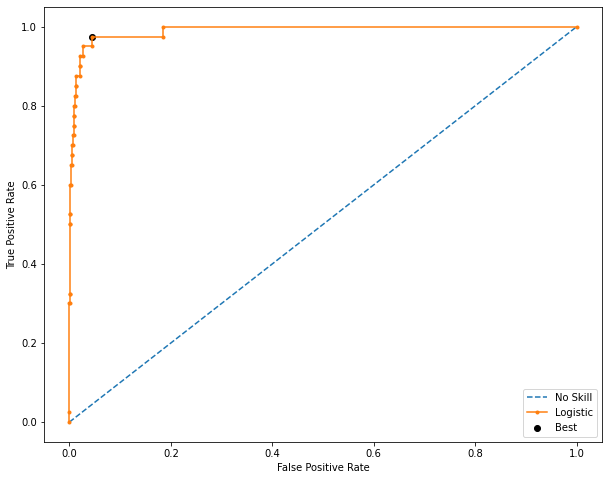

In [310]:
# plot the roc curve for the model
pyplot.figure(figsize=(10,8))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [311]:
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.011894


##Optimal Threshold for Precision-Recall Curve

In [312]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(testy, yhat)

In [313]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

In [314]:
print(fscore.shape)

(772,)


In [315]:
fscore

array([0.09864365, 0.0962963 , 0.09641533, 0.09653465, 0.09665428,
       0.09677419, 0.09689441, 0.09701493, 0.09713574, 0.09725686,
       0.09737828, 0.0975    , 0.09762203, 0.09774436, 0.097867  ,
       0.09798995, 0.09811321, 0.09823678, 0.09836066, 0.09848485,
       0.09860936, 0.09873418, 0.09885932, 0.09898477, 0.09911055,
       0.09923664, 0.09936306, 0.0994898 , 0.09961686, 0.09974425,
       0.09987196, 0.1       , 0.10012837, 0.10025707, 0.1003861 ,
       0.10051546, 0.10064516, 0.10077519, 0.10090556, 0.10103627,
       0.10116732, 0.1012987 , 0.10143043, 0.1015625 , 0.10169492,
       0.10182768, 0.10196078, 0.10209424, 0.10222805, 0.1023622 ,
       0.10249671, 0.10263158, 0.1027668 , 0.10290237, 0.10303831,
       0.1031746 , 0.10331126, 0.10344828, 0.10358566, 0.1037234 ,
       0.10386152, 0.104     , 0.10413885, 0.10427807, 0.10441767,
       0.10455764, 0.10469799, 0.10483871, 0.10497981, 0.10512129,
       0.10526316, 0.10540541, 0.10554804, 0.10569106, 0.10583

In [316]:
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.385114, F-Score=0.676


In [317]:
ix

740

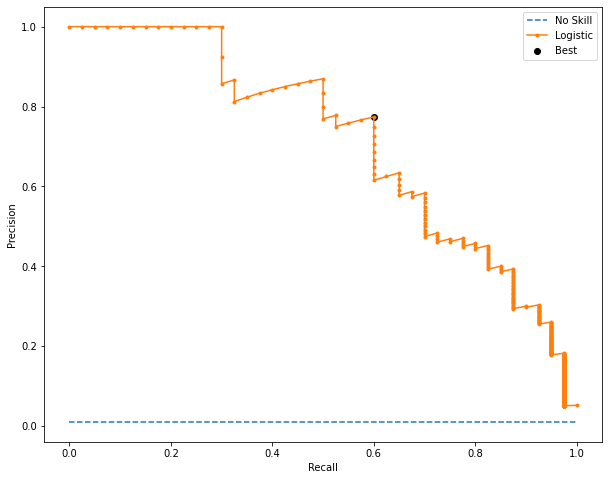

In [318]:
# plot the roc curve for the model
pyplot.figure(figsize=(10,8))
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

##Default Threshold of 0.5

In [319]:
# predict labels
yhat = model.predict(testX)

In [320]:
print(yhat.shape)

(4000,)


In [321]:
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [322]:
# evaluate the model
score = f1_score(testy, yhat)
print('F-Score: %.5f' % score)

F-Score: 0.61538


##Optimal Threshold Tuning

In [323]:
# predict probabilities
yhat = model.predict_proba(testX)

In [324]:
yhat.shape

(4000, 2)

In [325]:
yhat

array([[9.99919615e-01, 8.03854641e-05],
       [9.99329146e-01, 6.70853678e-04],
       [9.99905143e-01, 9.48570646e-05],
       ...,
       [2.56403925e-01, 7.43596075e-01],
       [9.99997267e-01, 2.73344832e-06],
       [9.99955150e-01, 4.48500415e-05]])

In [326]:
# keep probabilities for the positive outcome only
probs = yhat[:, 1]

In [327]:
probs.shape

(4000,)

In [328]:
probs

array([8.03854641e-05, 6.70853678e-04, 9.48570646e-05, ...,
       7.43596075e-01, 2.73344832e-06, 4.48500415e-05])

In [329]:
# define thresholds
thresholds = arange(0, 1, 0.001)

In [330]:
thresholds.shape

(1000,)

In [331]:
thresholds

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [332]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
  return (pos_probs >= threshold).astype('int')

In [333]:
# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

In [334]:
len(scores)

1000

In [335]:
scores

[0.019801980198019802,
 0.10583446404341926,
 0.13854351687388988,
 0.16666666666666666,
 0.1870503597122302,
 0.20799999999999996,
 0.22478386167146974,
 0.23999999999999996,
 0.25407166123778496,
 0.2662116040955631,
 0.28158844765342955,
 0.30115830115830117,
 0.30039525691699603,
 0.319327731092437,
 0.33187772925764186,
 0.33777777777777784,
 0.34234234234234234,
 0.35514018691588783,
 0.36538461538461536,
 0.3707317073170732,
 0.3781094527363184,
 0.38974358974358975,
 0.3979057591623037,
 0.40425531914893614,
 0.40860215053763443,
 0.4,
 0.4088397790055248,
 0.4180790960451977,
 0.42045454545454547,
 0.42528735632183906,
 0.4327485380116959,
 0.4431137724550898,
 0.4457831325301205,
 0.451219512195122,
 0.4567901234567901,
 0.4472049689440994,
 0.44025157232704404,
 0.4430379746835442,
 0.445859872611465,
 0.4516129032258065,
 0.4516129032258065,
 0.45751633986928103,
 0.46357615894039744,
 0.46357615894039744,
 0.4666666666666667,
 0.472972972972973,
 0.4761904761904762,
 0.479

In [336]:
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.349, F-Score=0.67606


In [337]:
ix

349